# Assignment 2

In [1]:
import numpy as np
import matplotlib.pylab as plt
import math as m
from scipy.optimize import curve_fit 

## 1.Population Growth

In [2]:
#Define constants
dt = 0.1
tmin = 0
tmax = 10
time = np.arange(tmin,tmax+dt,dt) #NOTE: ti = 0, tf = 10

#Make function that takes in a,b,n to compute array
def EulerPopGrowth(a,b,ni):
    N = np.zeros(len(time))
    N[0] = ni
    
    for i in range(1,len(time)):
        N[i] = N[i-1] + (a*N[i-1] - b*N[i-1]**2) * dt #Aprox of DE with Euler method. 
    return N

<Figure size 432x288 with 0 Axes>

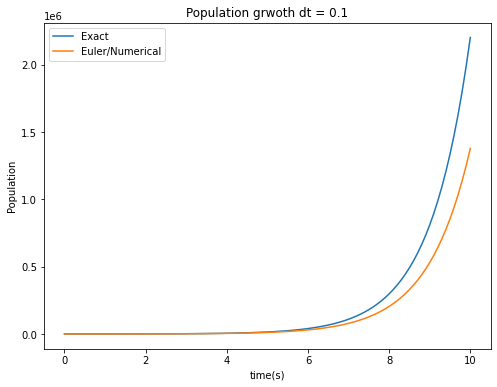

In [3]:
#A. with dt =0.1
Na = EulerPopGrowth(1,0,100)

#Get Exact values
Ne = np.zeros(len(time))
Ne[0] = 100
for i in range(1,len(time)):
    Ne[i] = 100 * m.exp(time[i]) #NOTE: THIS IS THE ANALYTICAL SOLUTION TO THE DE. 

#Format Plot
plt.figure()
plt.figure(figsize=(8,6))
plt.plot(time,Ne,label = 'Exact')
plt.plot(time,Na,label = 'Euler/Numerical')
plt.legend(loc = 'upper left')
plt.title('Population grwoth dt = 0.1')
plt.xlabel('time(s)')
plt.ylabel('Population')
#Print Plot
plt.show()

<Figure size 432x288 with 0 Axes>

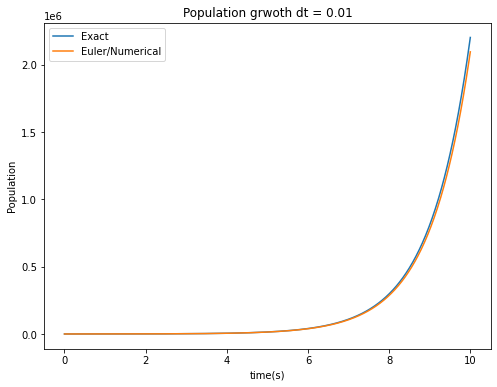

In [4]:
#A. with dt =0.01
dt = 0.01
time = np.arange(tmin,tmax+dt,dt) #NOTE: ti = 0, tf = 10

Na = EulerPopGrowth(1,0,100)

#Get Exact values
Ne = np.zeros(len(time))
Ne[0] = 100
for i in range(1,len(time)):
    Ne[i] = 100 * m.exp(time[i]) #NOTE: THIS IS THE ANALYTICAL SOLUTION TO THE DE. 

#Format Plot
plt.figure()
plt.figure(figsize=(8,6))
plt.plot(time,Ne,label = 'Exact')
plt.plot(time,Na,label = 'Euler/Numerical')
plt.legend(loc = 'upper left')
plt.title('Population grwoth dt = 0.01')
plt.xlabel('time(s)')
plt.ylabel('Population')
#Print Plot
plt.show()

### A. Analysis:
By reducing the value of dt from 0.1s to 0.01s the Euler approximation becomes closer to the true values. 

<Figure size 432x288 with 0 Axes>

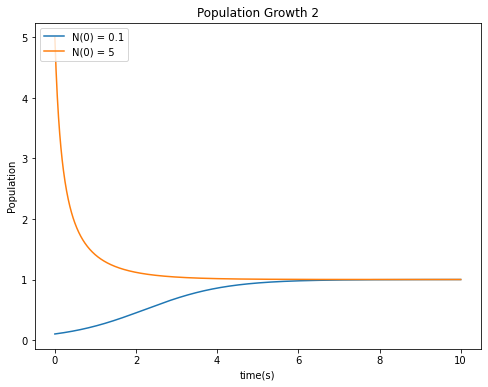

In [5]:
#B. NOTE: dt = 0.01
dt = 0.01
time = np.arange(tmin,tmax+dt,dt)

Nb1 = EulerPopGrowth(1,1,0.1)
Nb2 = EulerPopGrowth(1,1,5)

#Format plot
plt.figure()
plt.figure(figsize=(8,6))
plt.plot(time, Nb1, label = 'N(0) = 0.1')
plt.plot(time, Nb2, label = 'N(0) = 5')
plt.legend(loc = 'upper left')
plt.title('Population Growth 2')
plt.xlabel('time(s)')
plt.ylabel('Population')
plt.show()

### B. Analysis:
Both lines use the same A and B value. Due to this they will reach the same value of 1 population, this is because the 'b' term represents the deaths and is thus squared. While the 'a' term is used to represent the increase of population for available resources. Thus, the population is limited.

## 2.Radioactive Decay, revisited

In [6]:
#Define constants
dt = 0.001
tmin = 0
tmax = 8
time = np.arange(tmin,tmax+dt,dt)

#Define TouA and Nai
TouA = 2
Nint = 100 #Intial amount of A
NintB = 0 #Intitial amount of B

def EulerDecay(Ta,Tb,Nia,Nib): 
    #NOTE: Ta = decary constant 1, Tb = decary constant 2m, Nia = intial samples of a, Nib = intial samples of b
    NA = np.zeros(len(time))
    NB = np.zeros(len(time))
    NA[0] = Nia
    NB[0] = Nib
    
    for i in range(1,len(time)):
        NA[i] = NA[i-1] + ( -NA[i-1]/Ta ) *dt
        NB[i] = NB[i-1] + ( (NA[i-1]/Ta)-(NB[i-1]/Tb) ) *dt
    return NA, NB


<Figure size 432x288 with 0 Axes>

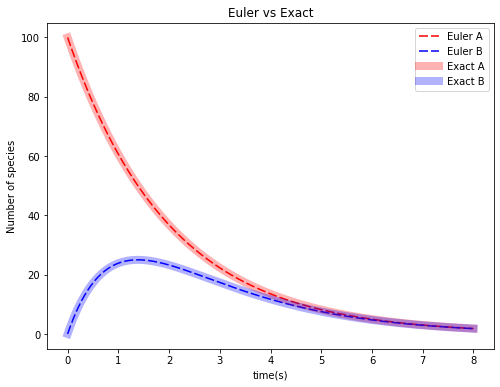

In [7]:
#Get and soolve system for exact values
Nae = np.zeros(len(time))
Nbe = np.zeros(len(time))
Nae[0] = Nint
for i in range(1,len(time)):
    Nae[i] = Nint*np.exp(-1*time[i]/TouA)
    Nbe[i] = Nint/(TouA/(TouA*0.5) - 1) * (np.exp(-1*time[i]/TouA) - np.exp(-1*time[i]/(0.5*TouA))) + NintB*np.exp(-1*time[i]/(0.5*TouA))

#Get Euler approx data
N1a,N1b= EulerDecay(TouA,TouA*0.5,Nint,0)

#Make plot 1
plt.figure()
plt.figure(figsize=(8,6))
plt.plot(time, N1a, label = 'Euler A',color = 'red',dashes=[6,2])
plt.plot(time, N1b, label = 'Euler B',color = 'blue',dashes=[6,2])
plt.plot(time, Nae, label = 'Exact A',color = 'red', alpha = 0.3,linewidth=8)
plt.plot(time, Nbe, label = 'Exact B',color = 'blue',alpha = 0.3,linewidth=8)
plt.legend(loc = 'upper right')
plt.title('Euler vs Exact')
plt.xlabel('time(s)')
plt.ylabel('Number of species')
plt.show()

### Analysis
As seen on the plot the Euler and exact solutions are close. This is because a small-time step of 0.001s was used. The trend of the lines may seem strange at first however they do make sense. The trend of sample A is simply an exponential decay. This is expected for a radioactive decay. However, the trend of sample B is not simply an exponential, however it is still radioactive decay. The reason for the difference is that sample B starts with an initial count of zero, thus it has nothing to decay at first. As sample A decays it becomes sample B. This then leads to an increase in sample B. As sample B decays slower than sample A the number of species increases. However, after a certain amount of time, in this case about 1.6s, sample B decays at a higher rate than A. This then leads to the decrease of the number of species of sample B.

<Figure size 432x288 with 0 Axes>

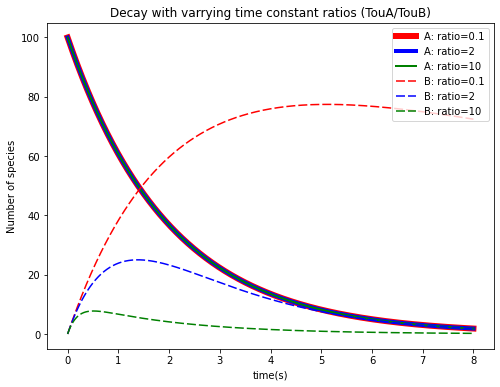

<Figure size 432x288 with 0 Axes>

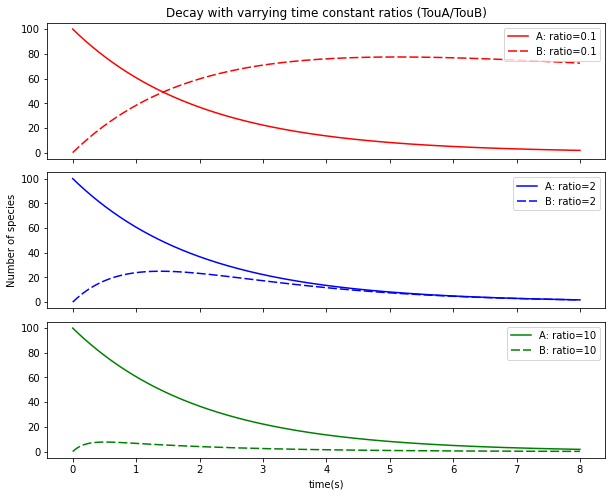

In [8]:
#Changing ratio of Ta over Tb. (Chose to leave TA alone)
A1,B1 = EulerDecay(TouA,TouA*10,Nint,0) #ta/tb = 0.1
A2,B2 = EulerDecay(TouA,TouA*0.5,Nint,0) #ta/tb = 2
A3,B3 = EulerDecay(TouA,TouA*0.1,Nint,0) #ta/tb = 10

#Plot A values
plt.figure()
plt.figure(figsize=(8,6))
plt.plot(time,A1,label = 'A: ratio=0.1', color = 'red',linewidth=6)
plt.plot(time,A2,label = 'A: ratio=2', color = 'blue',linewidth=4)
plt.plot(time,A3,label = 'A: ratio=10', color = 'green',linewidth=2)

#plot B values
plt.plot(time,B1,label = 'B: ratio=0.1', color = 'red',dashes=[6,2])
plt.plot(time,B2,label = 'B: ratio=2', color = 'blue',dashes=[6,2])
plt.plot(time,B3,label = 'B: ratio=10', color = 'green',dashes=[6,2])

#format plot
plt.legend(loc = 'upper right')
plt.title('Decay with varrying time constant ratios (TouA/TouB)')
plt.xlabel('time(s)')
plt.ylabel('Number of species')
plt.show()


#2nd Attempted graph
plt.figure()
plt.figure(figsize=(10,8))

#Plot tou = 10
p3 = plt.subplot(3,1,3) #On bottom
plt.plot(time,A3,label = 'A: ratio=10',color ='green')
plt.plot(time,B3,dashes=[6,2],label = 'B: ratio=10',color = 'green')
plt.xlabel('time(s)')
plt.legend(loc = 'upper right')

#Plot tou = 2
p2 = plt.subplot(3,1,2) #In middle
plt.plot(time,A2,label = 'A: ratio=2',color ='blue')
plt.plot(time,B2,dashes=[6,2],label = 'B: ratio=2',color = 'blue')
plt.ylabel('Number of species')
plt.setp(p2.get_xticklabels(), visible=False)
plt.legend(loc = 'upper right')

#Plot tou = 0.1
p1 = plt.subplot(3,1,1, sharex = p3) #On top
plt.plot(time,A1,label = 'A: ratio=0.1',color = 'red')
plt.plot(time,B1,dashes=[6,2],label = 'B: ratio=0.1',color = 'red')
plt.title('Decay with varrying time constant ratios (TouA/TouB)')
plt.setp(p1.get_xticklabels(), visible=False)
plt.legend(loc = 'upper right')


#Show figure
plt.subplots_adjust(hspace=0.1)
plt.show()

### Analysis
By adjusting the ratio of the decay constants, the time, it takes for the decrease in the number of species of sample B to occur changes. A lower ratio of TouA/TouB will increase the time it takes for the decreasing of sample B. This is simply due to the fact it takes longer for sample B to decay. A higher ratio leads to the opposite, the decreasing of sample B will occur sooner.

## 3.Atomic Enerfy Levels

In [9]:
#Declare constants
Tou = 1
tmin = 0
tmax = 3
de = 0.01
time = np.arange(tmin,tmax+dt,dt)

#define approx function
def energyLevelApprox2(p): 
    N1 = np.zeros(len(time))
    N2 = np.zeros(len(time))
    N1[0] = 1
    N2[0] = 0
    for i in range(1,len(time)):
        N1[i] = N1[i-1] + (-p*N1[i-1] + p*N2[i-1] + (N2[i-1]/Tou))*dt
        N2[i] = N2[i-1] + (p*N1[i-1] - p*N2[i-1] - (N2[i-1]/Tou)) *dt
    return N1,N2

<Figure size 432x288 with 0 Axes>

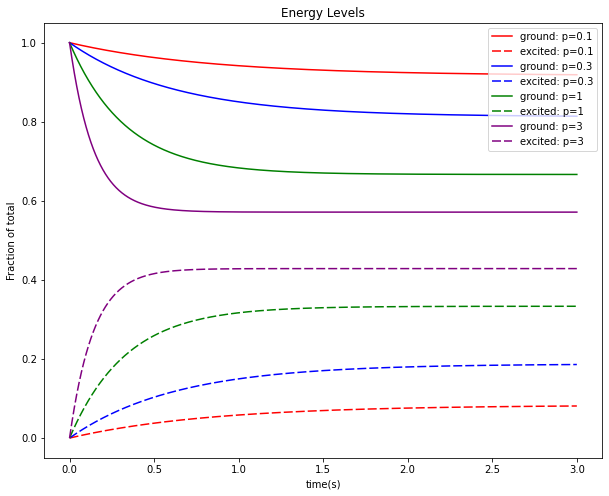

In [10]:
#Make plot 1
pa = [0.1,0.3,1,3]

#Gather all data. I know I could put this in a loop by i want sure how to format it if I did.
N1p1, N2p1 = energyLevelApprox2(pa[0])
N1p2, N2p2 = energyLevelApprox2(pa[1])
N1p3, N2p3 = energyLevelApprox2(pa[2])
N1p4, N2p4 = energyLevelApprox2(pa[3])

#Format plot. All lower energy will be solid. Upper dashed. P for conatnt color
plt.figure()
plt.figure(figsize=(10,8))
#plot pa[0]
plt.plot(time,N1p1,label = "ground: p={}".format(pa[0]),color = 'red')
plt.plot(time,N2p1,label = "excited: p={}".format(pa[0]),dashes=[6,2],color = 'red')
#plot pa[1]
plt.plot(time,N1p2,label = "ground: p={}".format(pa[1]),color = 'blue')
plt.plot(time,N2p2,label = "excited: p={}".format(pa[1]),dashes=[6,2],color = 'blue')
#plot pa[2]
plt.plot(time,N1p3,label = "ground: p={}".format(pa[2]),color = 'green')
plt.plot(time,N2p3,label = "excited: p={}".format(pa[2]),dashes=[6,2],color = 'green')
#plot pa[3]
plt.plot(time,N1p4,label = "ground: p={}".format(pa[3]),color = 'purple')
plt.plot(time,N2p4,label = "excited: p={}".format(pa[3]),dashes=[6,2],color = 'purple')

plt.legend(loc = 'upper right')
plt.title('Energy Levels')
plt.xlabel('time(s)')
plt.ylabel('Fraction of total')
plt.show()

### Analysis
As we increase the power of the ambient radiation field, we see that a higher percent of the atoms exist in the excited state. This is because as the ambient radiation field increases its strength it will provide the needed energy to raise the atoms to an excited state.

<Figure size 432x288 with 0 Axes>

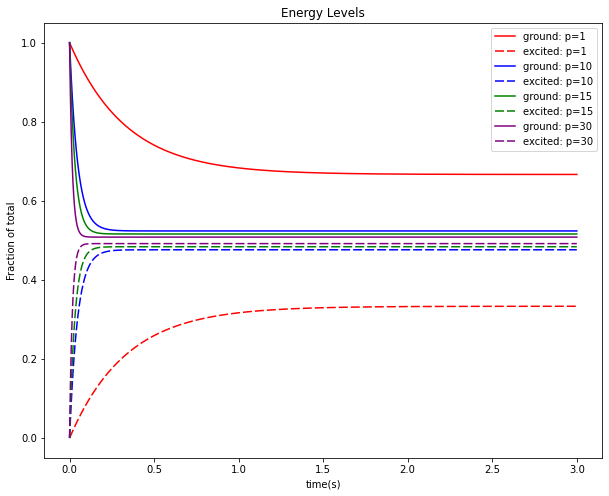

In [11]:
#4 inverstion point
pa = [1,10,15,30]

#Gather all data. I know I could put this in a loop by i want sure how to format it if I did.
N1p1, N2p1 = energyLevelApprox2(pa[0])
N1p2, N2p2 = energyLevelApprox2(pa[1])
N1p3, N2p3 = energyLevelApprox2(pa[2])
N1p4, N2p4 = energyLevelApprox2(pa[3])

#Format plot. All lower energy will be solid. Upper dashed. P for conatnt color
plt.figure()
plt.figure(figsize=(10,8))
#plot pa[0]
plt.plot(time,N1p1,label = "ground: p={}".format(pa[0]),color = 'red')
plt.plot(time,N2p1,label = "excited: p={}".format(pa[0]),dashes=[6,2],color = 'red')
#plot pa[1]
plt.plot(time,N1p2,label = "ground: p={}".format(pa[1]),color = 'blue')
plt.plot(time,N2p2,label = "excited: p={}".format(pa[1]),dashes=[6,2],color = 'blue')
#plot pa[2]
plt.plot(time,N1p3,label = "ground: p={}".format(pa[2]),color = 'green')
plt.plot(time,N2p3,label = "excited: p={}".format(pa[2]),dashes=[6,2],color = 'green')
#plot pa[3]
plt.plot(time,N1p4,label = "ground: p={}".format(pa[3]),color = 'purple')
plt.plot(time,N2p4,label = "excited: p={}".format(pa[3]),dashes=[6,2],color = 'purple')

plt.legend(loc = 'upper right')
plt.title('Energy Levels')
plt.xlabel('time(s)')
plt.ylabel('Fraction of total')
plt.show()

### Analysis
Continuing using the same method as before a plot was made with higher values of p, which is proportional to the ambient radiation field. Increasing P to any value results in a point of equilibrium where there is 50% of atoms in each of the two states. 

## 4.Three-Level System

In [12]:
#Declare constants
Tou21 = 1
Tou32 = 0.01
tmin = 0
tmax = 3
de = 0.01
time = np.arange(tmin,tmax+dt,dt)

#define approx function
def energyLevelApprox3(p): 
    N1 = np.zeros(len(time))
    N2 = np.zeros(len(time))
    N3 = np.zeros(len(time))
    N1[0] = 1
    N2[0] = 0
    N3[0] = 0
    for i in range(1,len(time)):
        N1[i] = N1[i-1] + (-p*N1[i-1] + p*N3[i-1] + N2[i-1]/Tou21) *dt
        N2[i] = N2[i-1] + (-N2[i-1]/Tou21 + N3[i-1]/Tou32) *dt
        N3[i] = N3[i-1] + (p*N1[i-1] - p*N3[i-1] - N3[i-1]/Tou32) *dt
    return N1,N2,N3

<Figure size 432x288 with 0 Axes>

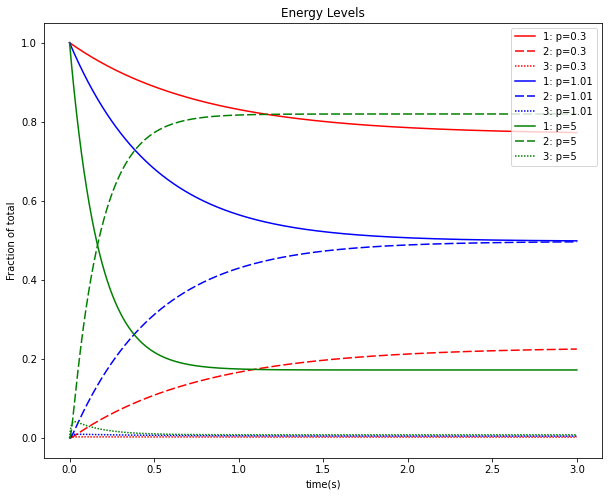

In [13]:
pa = [0.3, 1.01, 5]

#Gather all data. I know I could put this in a loop by i want sure how to format it if I did.
N1p1, N2p1,  N3p1 = energyLevelApprox3(pa[0])
N1p2, N2p2,  N3p2 = energyLevelApprox3(pa[1])
N1p3, N2p3,  N3p3 = energyLevelApprox3(pa[2])

#Format plot. All lower energy will be solid. Upper dashed. P for conatnt color
plt.figure()
plt.figure(figsize=(10,8))
#plot pa[0]
plt.plot(time,N1p1,label = "1: p={}".format(pa[0]),color = 'red')
plt.plot(time,N2p1,label = "2: p={}".format(pa[0]),dashes=[6,2],color = 'red')
plt.plot(time,N3p1,label = "3: p={}".format(pa[0]),dashes=[1,1],color = 'red')
#plot pa[1]
plt.plot(time,N1p2,label = "1: p={}".format(pa[1]),color = 'blue')
plt.plot(time,N2p2,label = "2: p={}".format(pa[1]),dashes=[6,2],color = 'blue')
plt.plot(time,N3p2,label = "3: p={}".format(pa[1]),dashes=[1,1],color = 'blue')
#plot pa[2]
plt.plot(time,N1p3,label = "1: p={}".format(pa[2]),color = 'green')
plt.plot(time,N2p3,label = "2: p={}".format(pa[2]),dashes=[6,2],color = 'green')
plt.plot(time,N3p3,label = "3: p={}".format(pa[2]),dashes=[1,1],color = 'green')

plt.legend(loc = 'upper right')
plt.title('Energy Levels')
plt.xlabel('time(s)')
plt.ylabel('Fraction of total')
plt.show()

### Analysis
Increasing the power pump does lead to a point of inversion where more atoms are in the excited state 2 then the ground state 1. A value of p = 1.01 makes it so the number of atoms in the 1st and 2nd state are equal. If p<1.01 then the number of atoms in state 1 is greatest. If p>1.01 then the inversion occurs and there are more atoms in the excited state 2. 

## 5.Projectile Motion with Air Resistance

In [14]:
#Define constants
g = 9.8
mass = 1 #Mass of object
dt = 0.02 
tmin = 0
tmax = 10
angle = m.pi/4
Cd = 0.08 #coefficent of drag

#Make Time Array
time = np.arange(tmin,tmax+dt,dt)

def getDragComps(vx,vy):
    V = (vx**2 + vy**2)**(1/2)
    drag = Cd*V**2
    fa = m.atan(vy/vx)
    dragx = np.cos(fa) * drag
    dragy = np.sin(fa) * drag
    return dragx, dragy
    
def getTraj(Vi): #NOTE: Uses pre initlized array, thus stors and plots Y values less then 0
    #Declare needed arrays
    X = np.zeros(len(time)) #Hold X pos
    Y = np.zeros(len(time))
    Vx = np.zeros(len(time)) #Hold Vx
    Vy = np.zeros(len(time))
    
    
    #initilize t=0 values
    X[0] = 0
    Y[0] = 0
    Vx[0] = np.cos(angle) * Vi
    Vy[0] = np.sin(angle) * Vi
    
    for i in range(1,len(time)):
        drgX,drgY = getDragComps(Vx[i-1],Vy[i-1])
        Vx[i] = Vx[i-1] + (-drgX/mass)*dt
        Vy[i] = Vy[i-1] + (-drgY/mass+ -g)*dt
        X[i] = X[i-1] + Vx[i-1]*dt
        Y[i] = Y[i-1] + Vy[i-1]*dt
    return X,Y

def getTraj2(Vi): #Note: Uses lists. Only appends list if Y > 0
    #Declare needed LISTS
    X = []
    Y = []
    Vx = []
    Vy = []
    
    #initilize t=0 values
    X.append(0)
    Y.append(0)
    Vx.append(np.cos(angle) * Vi)
    Vy.append(np.sin(angle) * Vi)
    
    for i in range(1,len(time)):
        drgX,drgY = getDragComps(Vx[i-1],Vy[i-1])
        Vx.append(Vx[i-1] + (-drgX/mass)*dt)
        Vy.append(Vy[i-1] + (-drgY/mass+ -g)*dt)
        Xc = (X[i-1] + Vx[i-1]*dt)
        Yc = (Y[i-1] + Vy[i-1]*dt)
        if  Yc > 0:
            X.append(Xc)
            Y.append(Yc)
        else:
            break
    
    return X,Y

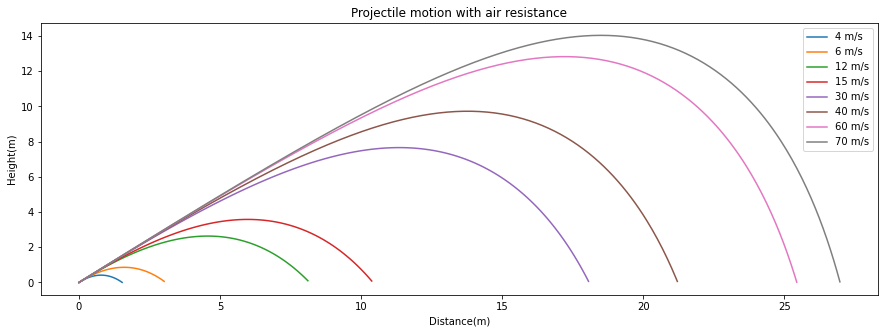

In [15]:
#Using function 2 with lists
#Declare Vo
Vo = [4,6,12,15,30,40,60,70] #2 small, 2 med, 2 large

MaxR = []

#Make Subplot
fig = plt.figure(figsize=(15,5))
plot1 = fig.add_subplot(1,1,1)

#Look Vo and plot
for s in Vo:
    X1,Y1 = getTraj2(s)
    MaxR.append(X1[len(X1)-1])
    plot1.plot(X1,Y1,label = "{} m/s".format(s))

#Format plot
plot1.legend(loc = 'upper right')
plot1.set_title('Projectile motion with air resistance')
plot1.set_xlabel('Distance(m)')
plot1.set_ylabel('Height(m)')
plt.show()

### Analysis
By adding air resiatance to the projectile it can be easilys seen that the tradjectory is no longer symetrical. 

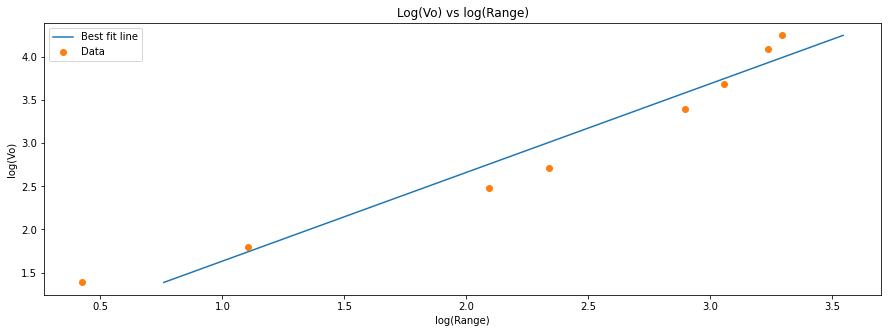

In [16]:
#Test if proportanilty is true

#Get maxR log
logR = np.log(MaxR)
logVo = np.log(Vo)

def testFit(x, m, b):
    return x*m + b

param, paramCov = curve_fit(testFit, logVo, logR)
fitlogR = []
for i in logVo:
    fitlogR.append(testFit(i,param[0],param[1]))
    
#Make PLot
fig = plt.figure(figsize=(15,5))
plot2 = fig.add_subplot(1,1,1)
plot2.set_title('Log(Vo) vs log(Range)')
plot2.plot(fitlogR,logVo,label = 'Best fit line')
plot2.plot(logR,logVo,'o', label ='Data')
plot2.set_xlabel('log(Range)')
plot2.set_ylabel('log(Vo)')
plot2.legend(loc = 'upper left')
plt.show()

### Analysis
As seen by the plot, the power rule still applies. The equation used is: $r \alpha v_o^n .$ In this case for a coefficient of drag of 0.08, the n must be 0.97. This was determined by creating a log($V_o$) vs log(Range). The slope is then equal to the power.